In [3]:
url = "https://www.billboard.com/charts/billboard-200/"

In [4]:
import requests
from bs4 import BeautifulSoup

In [5]:
res = requests.get(url)
res

<Response [200]>

In [6]:
raw_html = res.text

In [7]:
soup = BeautifulSoup(raw_html,'html.parser')

In [8]:
songs = soup.select('li h3')
songs[5]

<h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only" id="title-of-a-story">

	
	
		
					SOS		
	
</h3>

In [9]:
top_200 = [song.text for song in songs]
top_200[7]

'\n\n\t\n\t\n\t\t\n\t\t\t\t\tZach Bryan\t\t\n\t\n'

In [12]:
top_200 = [string.replace('\n','').replace('\t','') for string in top_200]
top_200[:5]

['Eternal Sunshine',
 'Deeper Well',
 'One Thing At A Time',
 'Everything I Thought It Was',
 'Stick Season']

In [14]:
#@ title Singers
singers = [song.find_next_sibling() for song in songs ]
singers[3:8]

[<span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only">
 	
 	Justin Timberlake
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only">
 	
 	Noah Kahan
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only">
 	
 	SZA
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only">
 	
 	Taylo

In [15]:
singers = [singer.string for singer in singers]
singers[6:9]

['\n\t\n\tTaylor Swift\n', '\n\t\n\tZach Bryan\n', '\n\t\n\tTaylor Swift\n']

In [17]:
cleaned_singers = [string.replace('\n', '').replace('\t', '') if string else 'None' for string in singers]
cleaned_singers[7:20]

['Zach Bryan',
 'Taylor Swift',
 '¥$: Ye & Ty Dolla $ign',
 'Morgan Wallen',
 'Drake',
 'Taylor Swift',
 'Travis Scott',
 'Zach Bryan',
 '21 Savage',
 'Taylor Swift',
 'Olivia Rodrigo',
 'Post Malone',
 'BossMan Dlow']

In [18]:
cleaned_singers = cleaned_singers[:200]
top_200 = top_200[:200]

In [19]:
print(f"he number of songs : {len(top_200)}")
print(f"he number of singers : {len(cleaned_singers)}")

he number of songs : 200
he number of singers : 200


In [20]:
top_200[199] , cleaned_singers[199]

('Wasteland, Baby!', 'Hozier')

In [21]:
import pandas as pd

dict_data = {
    'Singer' : cleaned_singers ,
    'Song'   : top_200
}

df = pd.DataFrame(dict_data)

In [22]:
df

,Singer,Song
0,Ariana Grande,Eternal Sunshine
1,Kacey Musgraves,Deeper Well
2,Morgan Wallen,One Thing At A Time
3,Justin Timberlake,Everything I Thought It Was
4,Noah Kahan,Stick Season
...,...,...
195,The Cranberries,Stars: The Best Of 1992-2002
196,Rod Wave,Pray 4 Love
197,Zach Bryan,Boys Of Faith (EP)
198,The Weeknd,House Of Balloons


In [23]:
df.Singer.value_counts()

Singer
Taylor Swift              10
Drake                      7
Zach Bryan                 5
The Weeknd                 4
Kanye West                 4
                          ..
Lainey Wilson              1
Original Broadway Cast     1
Journey                    1
Bryson Tiller              1
The Cranberries            1
Name: count, Length: 135, dtype: int64

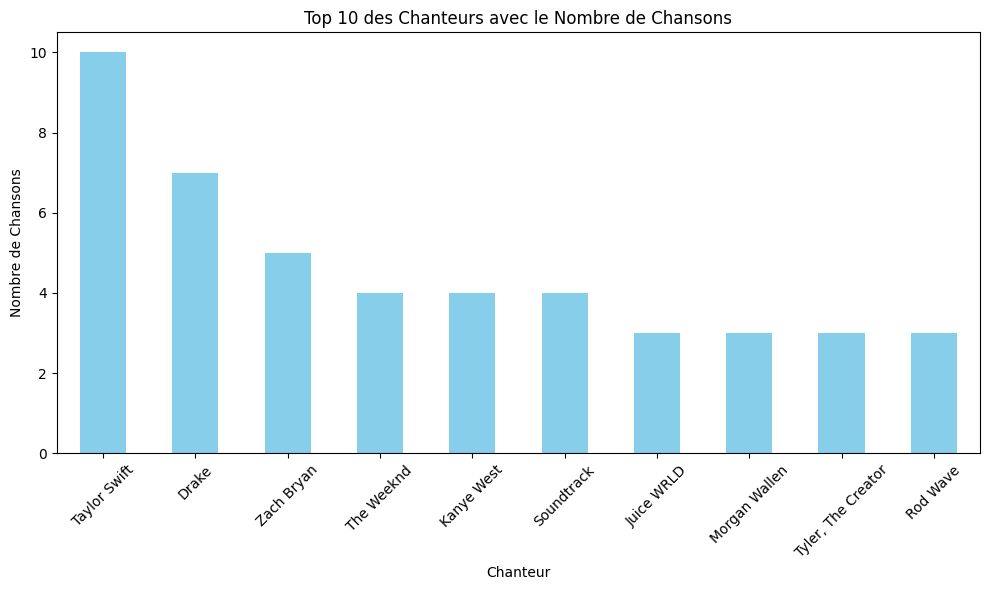

In [24]:
import matplotlib.pyplot as plt

# Supposons que df contient votre DataFrame

# Compter les occurrences de chaque chanteur et sélectionner les 10 premiers
top_10_singers = df['Singer'].value_counts().head(10)

# Tracer un graphique à barres
plt.figure(figsize=(10, 6))
top_10_singers.plot(kind='bar', color='skyblue')
plt.xlabel('Chanteur')
plt.ylabel('Nombre de Chansons')
plt.title('Top 10 des Chanteurs avec le Nombre de Chansons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
import datetime

current_date = datetime.datetime.now().strftime('%Y-%m-%d')

# Nom du fichier avec la date
file_name = f'Top_200_hits_{current_date}.xlsx'

# Enregistrer le DataFrame dans un fichier CSV avec la date dans le nom
df.to_excel(file_name, index=False)

print(f"DataFrame enregistré dans '{file_name}'")

DataFrame enregistré dans 'Top_200_hits_2024-03-29.xlsx'
